In [2]:
#Libraries Import
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_curve,auc , f1_score
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
# Load Data Set
data = pd.read_csv('C:/Users/Cv/Desktop/Data Folder/student.csv')

In [4]:
# Checking Information of Data
print(data.head())
print(data.info())

   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

      Sleep Duration Dietary Habits   Degree  \
0          5-6 hours        Healthy  B.Pharm   
1          5-6 hours       Moderate      BSc   
2  Less than 5 hours        Healthy       BA   
3          7-8

In [5]:
# ENcoding NON int type columns
encode = LabelEncoder()
columns=['Gender','City','Profession','Sleep Duration','Dietary Habits','Degree','Have you ever had suicidal thoughts ?','Family History of Mental Illness']

for col in columns:
    data[col]=encode.fit_transform(data[col])

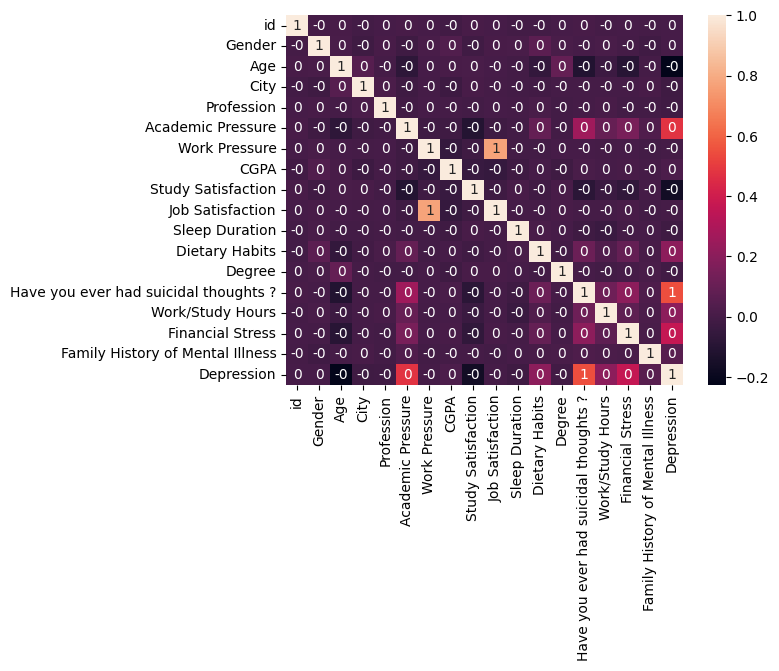

In [6]:
# Checking dependencies of columns 

corr = data.corr()
plt.figure(dpi=100)
sns.heatmap(data.corr(), annot=True, fmt='.0f')
plt.show()

In [7]:
# Checking Values Dependencies of Target Column in numeric Form
print(corr['Depression'].sort_values(ascending=False))

Depression                               1.000000
Have you ever had suicidal thoughts ?    0.546277
Academic Pressure                        0.474835
Financial Stress                         0.363591
Work/Study Hours                         0.208563
Dietary Habits                           0.206605
Family History of Mental Illness         0.053430
CGPA                                     0.022210
Gender                                   0.001794
id                                       0.000923
Work Pressure                           -0.003351
Job Satisfaction                        -0.003482
Degree                                  -0.015027
Profession                              -0.016437
Sleep Duration                          -0.022411
City                                    -0.024788
Study Satisfaction                      -0.167971
Age                                     -0.226422
Name: Depression, dtype: float64


In [8]:
# Dropping Unnecessary Columns
# 'Job Satisfaction', ,'Sleep Duration',' ,'Study Satisfaction' 'Work Pressure'
data = data.drop(columns=['Degree','Profession','City'])

In [9]:
# Checking for Null Values

print("Null Values in the dataset:")
print(data.isnull().sum())

Null Values in the dataset:
id                                       0
Gender                                   0
Age                                      0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [10]:
# Filling null values
data['Financial Stress']= data['Financial Stress'].fillna(data['Financial Stress'].mean())

In [11]:
# Statically Analyze the Data .... checking Outliers
desc=data.describe()
print(desc)

                  id        Gender           Age  Academic Pressure  \
count   27901.000000  27901.000000  27901.000000       27901.000000   
mean    70442.149421      0.557220     25.822300           3.141214   
std     40641.175216      0.496724      4.905687           1.381465   
min         2.000000      0.000000     18.000000           0.000000   
25%     35039.000000      0.000000     21.000000           2.000000   
50%     70684.000000      1.000000     25.000000           3.000000   
75%    105818.000000      1.000000     30.000000           4.000000   
max    140699.000000      1.000000     59.000000           5.000000   

       Work Pressure          CGPA  Study Satisfaction  Job Satisfaction  \
count   27901.000000  27901.000000        27901.000000      27901.000000   
mean        0.000430      7.656104            2.943837          0.000681   
std         0.043992      1.470707            1.361148          0.044394   
min         0.000000      0.000000            0.000000  

In [12]:
# Handling Outliers and Dropping them
# Handling Outliers
q3=desc.loc['75%']
q1=desc.loc['25%']
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

data = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]

In [13]:
# Checking Data Distribution or proportion of Data Distribution or imbalance chceking
# Checking the proportion of dataset
for d in data:
    print(data[d].value_counts(normalize=True)*100)

id
2         0.003589
94204     0.003589
94272     0.003589
94270     0.003589
94256     0.003589
            ...   
46887     0.003589
46884     0.003589
46880     0.003589
46877     0.003589
140699    0.003589
Name: proportion, Length: 27860, dtype: float64
Gender
1    55.728643
0    44.271357
Name: proportion, dtype: float64
Age
24.0    8.101220
20.0    8.022254
28.0    7.645370
29.0    6.995693
33.0    6.791098
25.0    6.396267
21.0    6.191673
23.0    5.897344
18.0    5.685571
19.0    5.599426
34.0    5.262024
27.0    5.244078
31.0    5.111271
32.0    4.522613
22.0    4.160086
26.0    4.142139
30.0    4.102656
35.0    0.035894
36.0    0.025126
38.0    0.025126
42.0    0.014358
39.0    0.010768
43.0    0.007179
37.0    0.007179
41.0    0.003589
Name: proportion, dtype: float64
Academic Pressure
3.0    26.737258
5.0    22.587940
4.0    18.474515
1.0    17.214645
2.0    14.974874
0.0     0.010768
Name: proportion, dtype: float64
Work Pressure
0.0    100.0
Name: proportion, dtype: flo

In [14]:
# Handling the imbalance DataSet using SMOTE

x= data.drop(columns=['Depression'])
y = data['Depression']

sm= SMOTE(random_state=42, sampling_strategy='auto', k_neighbors=5)

x_resampled, y_resampled = sm.fit_resample(x, y)

In [15]:
# Checking the proportion of resampled dataset

print(y_resampled.value_counts(normalize=True) * 100)

Depression
1    50.0
0    50.0
Name: proportion, dtype: float64


In [16]:
# Scaling the Data
scale = MinMaxScaler()
scaled_columns = ['id','Age','Work/Study Hours','Financial Stress','Academic Pressure']

x_resampled[scaled_columns] = scale.fit_transform(x_resampled[scaled_columns])

In [17]:
# Checking the dataset after resampling and scaling

print(x_resampled.head())

         id  Gender   Age  Academic Pressure  Work Pressure  CGPA  \
0  0.000000       1  0.60                1.0            0.0  8.97   
1  0.000043       0  0.24                0.4            0.0  5.90   
2  0.000171       1  0.52                0.6            0.0  7.03   
3  0.000199       0  0.40                0.6            0.0  5.59   
4  0.000213       0  0.28                0.8            0.0  8.13   

   Study Satisfaction  Job Satisfaction  Sleep Duration  Dietary Habits  \
0                 2.0               0.0               0               0   
1                 5.0               0.0               0               1   
2                 5.0               0.0               2               0   
3                 2.0               0.0               1               1   
4                 3.0               0.0               0               1   

   Have you ever had suicidal thoughts ?  Work/Study Hours  Financial Stress  \
0                                      1          0.25

In [18]:
# Splitting the Data into Train and Test Set

x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=42)

In [25]:
# Train Our Model on Gradient Boosting Algorithm

rnf = GradientBoostingClassifier(n_estimators=300,learning_rate=0.05,random_state=42,max_features=5)

rnf.fit(x_train,y_train)
y_pred = rnf.predict(x_test)

score = accuracy_score(y_test,y_pred)
print(score)

0.8730085784313726


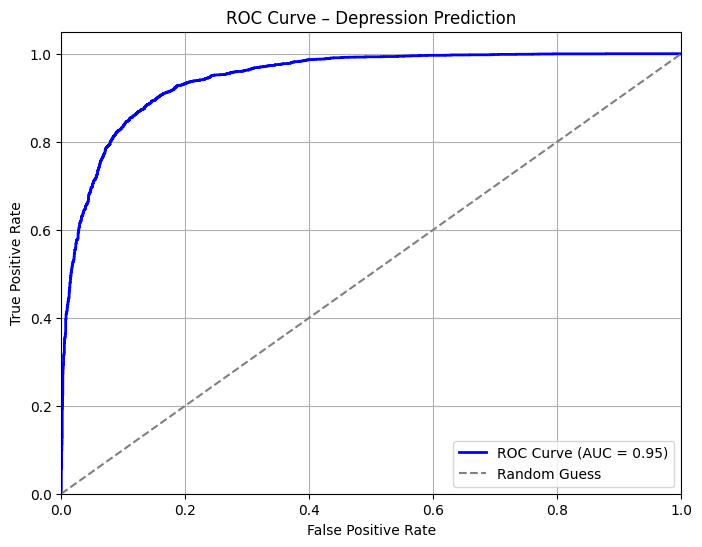

In [20]:
# ROC Curve 

# Get predicted probabilities for positive class
y_proba = rnf.predict_proba(x_test)[:, 1]

# Compute False Positive Rate, True Positive Rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Compute AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')

# Axis and Title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Depression Prediction')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [21]:
# Checking F1 score
f1Score = f1_score(y_test,y_pred) 

print("F1 Score is : " , f1Score)

F1 Score is :  0.8748301373999698
